<a href="https://colab.research.google.com/github/bountyhunter12/ML/blob/main/metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv('/content/placement 1.csv')

In [38]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package(in lpa)')

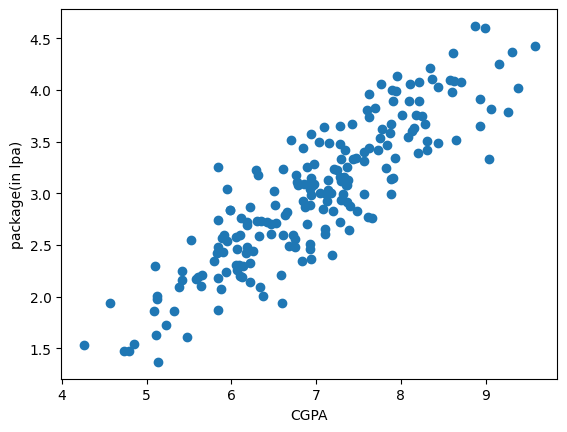

In [39]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('package(in lpa)')

In [40]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [41]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr = LinearRegression()

In [45]:
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
x_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [47]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [48]:
lr.predict(x_test.iloc[2].values.reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.38464568])

Text(0, 0.5, 'package(in lpa)')

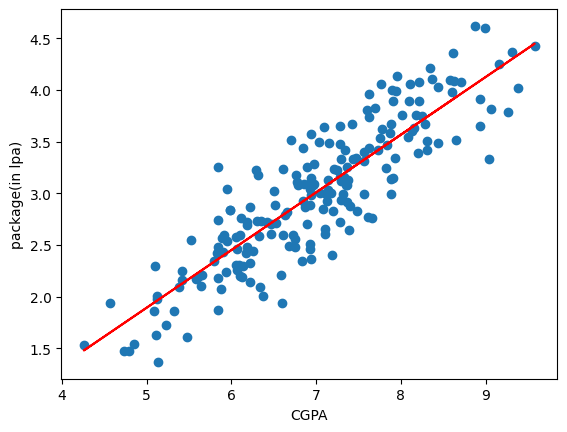

In [49]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('package(in lpa)')

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [51]:
y_pre = lr.predict(x_test)

In [52]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [53]:
print("MAE",mean_absolute_error(y_test,y_pre))

MAE 0.2884710931878175


In [54]:
print("MSE",mean_squared_error(y_test,y_pre))

MSE 0.12129235313495527


In [55]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pre)))

RMSE 0.34827051717731616


In [56]:
r2 = r2_score(y_test,y_pre)
print("R2",r2_score(y_test,y_pre))

R2 0.780730147510384


In [57]:
#Adjusted R2 score
x_test.shape

(40, 1)

In [58]:
1 - (((1-r2)*(40-1))/(40-1-1))

0.7749598882343415

In [59]:
df1 = df.copy()
df1['random'] = np.random.random(200)
df1 = df1[['cgpa','random','package']]
df1.head()

,cgpa,random,package
0,6.89,0.516700,3.26
1,5.12,0.898772,1.98
2,7.82,0.907531,3.25
3,7.42,0.140056,3.67
4,6.94,0.129746,3.57


Text(0, 0.5, 'package(in lpa)')

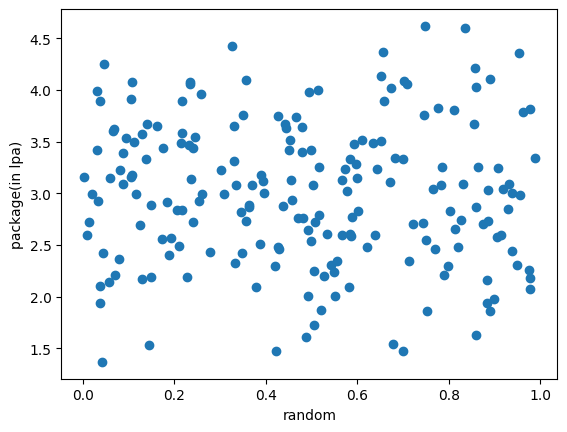

In [60]:
plt.scatter(df1['random'],df1['package'])
plt.xlabel('random')
plt.ylabel('package(in lpa)')

In [61]:
x = df1.iloc[:,0:2]
y = df1.iloc[:,-1]

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [63]:
lr = LinearRegression()

In [64]:
lr.fit(x_train,y_train)

LinearRegression()

In [65]:
y_pre = lr.predict(x_test)

In [66]:
print("R2",r2_score(y_test,y_pre))
r2 = r2_score(y_test,y_pre)

R2 0.7801891921837517


In [67]:
1 - (((1-r2)*(40-1))/(40-1-2))

0.7683075268963869

In [68]:
df2 = df.copy()
df2['iq'] = df2['package']+ (np.random.randint(-12,12,200)/10)
df2 = df2[['cgpa','iq','package']]


In [69]:
df2.sample(5)

,cgpa,iq,package
74,6.85,3.34,3.44
110,8.18,3.76,3.76
156,7.38,2.13,3.13
193,4.57,1.64,1.94
4,6.94,4.67,3.57


Text(0, 0.5, 'package(in lpa)')

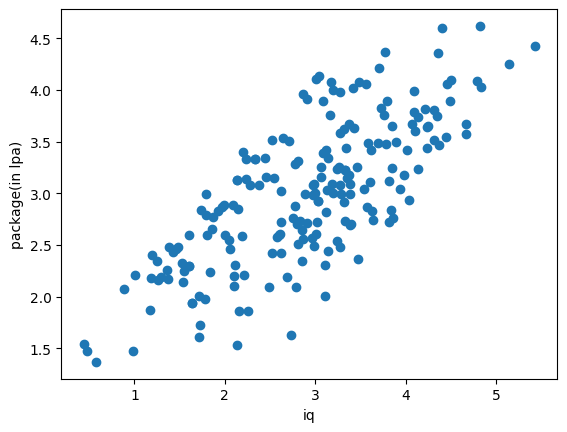

In [70]:
plt.scatter(df2['iq'],df2['package'])
plt.xlabel('iq')
plt.ylabel('package(in lpa)')

In [71]:
np.random.randint(-100,100)

-93

In [72]:
x = df2.iloc[:,0:2]
y = df2.iloc[:,-1]

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [74]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pre = lr.predict(x_test)

In [75]:
print("R2",r2_score(y_test,y_pre))
r2 = r2_score(y_test,y_pre)

R2 0.8527269251532992


In [76]:
1 - (((1-r2)*(40-1))/(40-1-2))

0.8447662184048288